# Very Basic Astro Analyses using Python and Jupyter Notebook

- hello `python`, hello `jupyter`, and hello `astronomy` ! 

In [1]:
# generate edges 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
import gc

# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
import pyarrow.parquet as pq

## This is Levy Walk

In [3]:
from scipy.stats import uniform

In [4]:
def levy_periodic(rzero,inpow,x,y,z,sysL=1.0):
    # 3-D Levy Walks
    tmppi = uniform.rvs(loc=0.0,scale=2.*np.pi)
    tmpcos = 2.0*uniform.rvs() - 1.0
    tmpsin = np.sqrt(1.0 - tmpcos*tmpcos)  
    tmpl = rzero * np.power(uniform.rvs(), -1.0/inpow)
    
    nx = x + tmpl * tmpsin * np.cos(tmppi)
    ny = y + tmpl * tmpsin * np.sin(tmppi)
    nz = z + tmpl * tmpcos
    
    #print(x,y,z,nx,ny,nz)
    
    # Periodic Boundary
    if nx >= sysL:
        nx = nx - sysL * np.floor(nx/sysL)
    if ny >= sysL:
        ny = ny - sysL * np.floor(ny/sysL)
    if nz >= sysL:
        nz = nz - sysL * np.floor(nz/sysL)
    
    if nx < 0.0:
        nx = nx + sysL * (1.0 + np.floor(np.abs(nx)/sysL))
    if ny < 0.0:
        ny = ny + sysL * (1.0 + np.floor(np.abs(ny)/sysL))
    if nz < 0.0:
        nz = nz + sysL * (1.0 + np.floor(np.abs(nz)/sysL))
        
    return np.double([nx,ny,nz,tmpl])

In [5]:
xlv = []
ylv = []
zlv = []
llv = []
numlv = 2000

walker = np.double([0.5,0.5,0.5,0.5])

#xlv.append(walker[0])
#ylv.append(walker[1])
#zlv.append(walker[2])
#llv.append(walker[3])
for i in range(numlv):
    walker = levy_periodic(0.01,1.2,walker[0],walker[1],walker[2],sysL=1.0)
    xlv.append(walker[0])
    ylv.append(walker[1])
    zlv.append(walker[2])
    llv.append(walker[3])

### Measuring Two Point Function for Levy Walks

In [6]:
from astroML.correlation import two_point

In [7]:
Xlv = np.stack([xlv,ylv,zlv],axis=1)

In [8]:
bins, binstep = np.linspace(np.log10(0.005), np.log10(1.0), 25, retstep=True)

In [9]:
xbins = bins[1:] - binstep*0.5
xbins = np.power(10,xbins)

In [10]:
bins = np.power(10,bins)
corr = two_point(Xlv, bins)
corr.shape

(24,)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


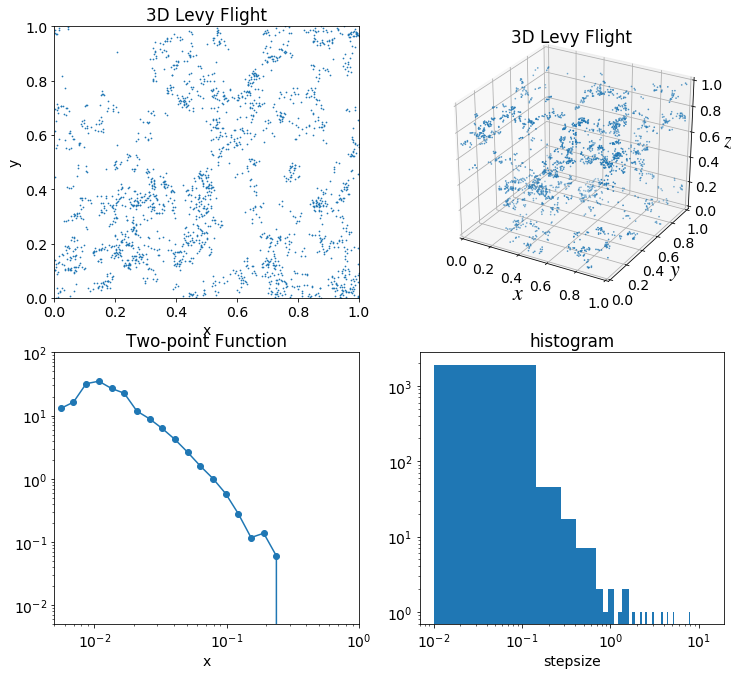

In [11]:
from mpl_toolkits.mplot3d import Axes3D


# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 14})
plt.rcParams['mathtext.fontset'] = 'stix'

# initialize figure
fig = plt.figure( figsize=(12,11) )

# plot 2D random walk with Levy stepsize
plt.subplot(221)
plt.axis([0,1,0,1])
plt.scatter( xlv, ylv, s=0.5 )
plt.xlabel( 'x' )
plt.ylabel( 'y' )
plt.title(r'3D Levy Flight' )

ax = fig.add_subplot(222, projection='3d')
ax.set_title(r'3D Levy Flight')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(xlv,ylv,zlv,s=0.5)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)

# plot histogram
plt.subplot(223)

plt.axis([0.005,1,0.005,100])
plt.yscale( 'log' )
plt.xscale( 'log' )
plt.xlabel( 'x' )
plt.title( 'Two-point Function' )
plt.scatter(xbins,corr)
plt.plot(xbins,corr)

# plot histogram
plt.subplot(224)
#num_bins = n/10
plt.hist( llv, bins=100 )
plt.yscale( 'log' )
plt.xscale( 'log' )
plt.xlabel( 'stepsize' )
plt.title( 'histogram' )

plt.show()